In [1]:
from pycaret.datasets import get_data
import pandas as pd

dataset = pd.read_csv('../datastore/training/FPL_data_24_25.csv')
print(dataset.head(10))
print(dataset.shape) #407, 13

           name  price     team  goals  assists  goal_contributions  \
0          Raya    5.5  Arsenal      0        0                   0   
1  Arrizabalaga    4.5  Arsenal      0        0                   0   
2          Hein    4.0  Arsenal      0        0                   0   
3       Setford    4.0  Arsenal      0        0                   0   
4       Gabriel    6.0  Arsenal      3        2                   5   
5        Saliba    6.0  Arsenal      2        0                   2   
6     Calafiori    5.5  Arsenal      2        1                   3   
7      J.Timber    5.5  Arsenal      1        3                   4   
8        Kiwior    5.5  Arsenal      1        0                   1   
9  Lewis-Skelly    5.5  Arsenal      1        0                   1   

   games_played  minutes  total_points  points_per_game     roi position  \
0            38     3420           142              3.7  25.820       GK   
1            31     2790           106              3.4  23.560   

In [2]:
data = dataset.sample(frac=0.85, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (582, 13)
Unseen Data For Predictions: (103, 13)


In [3]:
from pycaret.regression import *
s = setup(data = data, target = 'roi', session_id=7177, ignore_features=['name'])
print(s)

,Description,Value
0,Session id,7177
1,Target,roi
2,Target type,Regression
3,Original data shape,"(582, 13)"
4,Transformed data shape,"(582, 34)"
5,Transformed train set shape,"(407, 34)"
6,Transformed test set shape,"(175, 34)"
7,Ignore features,1
8,Numeric features,9
9,Categorical features,2


In [4]:
best = compare_models()


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,07:03:12
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.3969,0.6217,0.7667,0.9898,0.0581,0.0745,0.0110
lightgbm,Light Gradient Boosting Machine,0.4134,0.7496,0.8485,0.9871,0.0616,0.0762,0.2230
et,Extra Trees Regressor,0.4410,0.7920,0.8642,0.9866,0.0597,0.0794,0.0180
rf,Random Forest Regressor,0.4612,0.8360,0.8959,0.9861,0.0641,0.0864,0.0190
ada,AdaBoost Regressor,0.8172,1.2321,1.0934,0.9794,0.3364,0.2001,0.0100
lr,Linear Regression,0.7188,1.2115,1.0319,0.9790,0.3399,0.3446,0.2000
ridge,Ridge Regression,0.7137,1.2121,1.0295,0.9790,0.3333,0.3427,0.1120
br,Bayesian Ridge,0.7011,1.2273,1.0288,0.9787,0.3151,0.3351,0.0050
dt,Decision Tree Regressor,0.6100,1.5753,1.2133,0.9728,0.0861,0.1112,0.0060
omp,Orthogonal Matching Pursuit,0.8021,2.0699,1.3384,0.9641,0.1983,0.1868,0.0050


In [5]:
lightgbm = create_model('lightgbm')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,07:03:21
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4230,0.6455,0.8034,0.9897,0.0578,0.0840
1,0.3675,0.5488,0.7408,0.9906,0.0541,0.0764
2,0.4305,0.6754,0.8218,0.9875,0.0569,0.0812
3,0.5006,1.3463,1.1603,0.9743,0.0793,0.0785
4,0.3606,0.3859,0.6212,0.9949,0.0519,0.0530
5,0.5627,1.3665,1.1690,0.9827,0.0740,0.0641
6,0.4704,0.6688,0.8178,0.9889,0.0745,0.0734
7,0.3731,0.5758,0.7588,0.9873,0.0600,0.0787
8,0.4084,0.7833,0.8851,0.9856,0.0645,0.0910


In [6]:
tuned_lightgbm = tune_model(lightgbm)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,07:03:24
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4327,0.8232,0.9073,0.9868,0.0673,0.0734
1,0.4674,0.7579,0.8706,0.9870,0.0834,0.1551
2,0.4713,0.7774,0.8817,0.9857,0.0816,0.1328
3,0.6169,1.3368,1.1562,0.9745,0.1009,0.1275
4,0.6424,1.0486,1.0240,0.9861,0.0914,0.1045
5,0.6315,1.2831,1.1327,0.9838,0.0964,0.1015
6,0.5350,0.8258,0.9088,0.9863,0.1384,0.0924
7,0.4024,0.5089,0.7134,0.9888,0.0938,0.1268
8,0.4480,0.8436,0.9185,0.9845,0.0786,0.1344


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


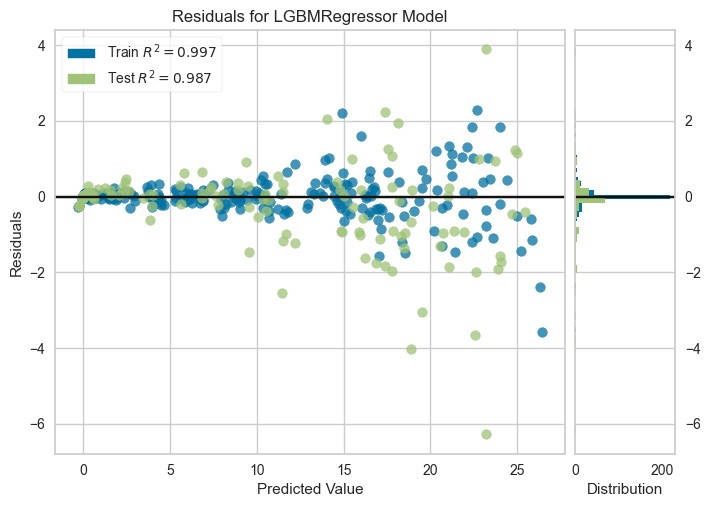

In [7]:
plot_model(tuned_lightgbm)

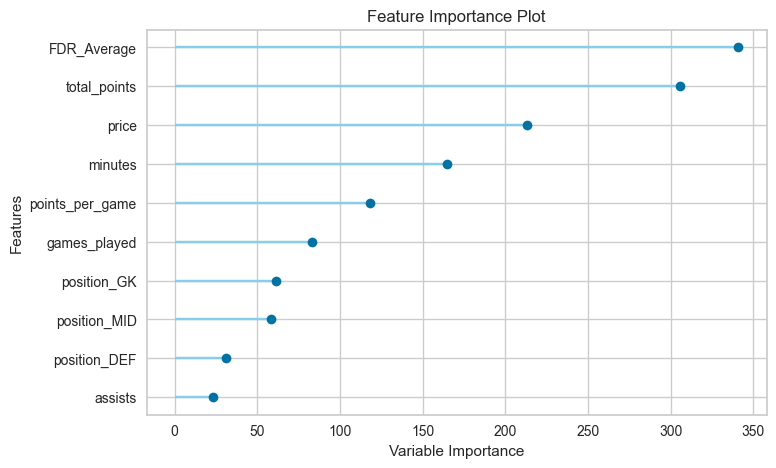

In [8]:
plot_model(tuned_lightgbm, plot='feature')

In [9]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [10]:
print(final_lightgbm)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['price', 'goals', 'assists',
                                             'goal_contributions',
                                             'games_played', 'minutes',
                                             'total_points', 'points_per_game',
                                             'FDR_Average'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['team', 'position'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['team', 'position'],
                                    transformer=OneHotEncoder(cols=['team',
                                                                    'position'],
                                              

In [11]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head(100)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.4361,1.3430,1.1589,0.9799,0.0901,0.0667


,name,price,team,goals,assists,goal_contributions,games_played,minutes,total_points,points_per_game,position,FDR_Average,roi,prediction_label
0,Setford,4.0,Arsenal,0,0,0,0,0,0,0.0,GK,7.596491,0.000,0.048346
1,Saliba,6.0,Arsenal,2,0,2,35,3039,130,3.7,DEF,7.596491,21.670,22.877695
2,J.Timber,5.5,Arsenal,1,3,4,27,2415,114,3.8,DEF,7.596491,20.730,19.650600
3,Kacurri,4.0,Arsenal,0,0,0,0,0,0,0.0,DEF,7.596491,0.000,0.030002
4,Nichols,4.0,Arsenal,0,0,0,0,0,0,0.0,DEF,7.596491,0.000,0.030002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Walker-Peters,4.5,West Ham,0,0,0,0,0,0,0.0,DEF,-3.280702,0.000,-0.003076
96,José Sá,4.5,Wolves,0,0,0,29,2610,93,3.2,GK,-3.631579,20.670,20.169001
97,Agbadou,4.5,Wolves,1,0,1,16,1410,45,2.8,DEF,-3.631579,10.000,10.090497
98,R.Gomes,4.5,Wolves,2,0,2,7,794,42,1.7,DEF,-3.631579,9.333,8.274172


In [12]:
save_model(final_lightgbm,'Final Lightgbm Model ROI-Target')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['price', 'goals', 'assists',
                                              'goal_contributions',
                                              'games_played', 'minutes',
                                              'total_points', 'points_per_game',
                                              'FDR_Average'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['team', 'position'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['team', 'position'],
                                     transformer=OneHotEncoder(cols=['team',
                                                                     'position'],
                               

In [16]:

saved_final_lightgbm = load_model('Final Lightgbm Model ROI-Target')

data_new = pd.read_csv('../datastore/current/FPL_data_36.csv')
new_prediction = predict_model(saved_final_lightgbm, data=data_new).sort_values('prediction_label', ascending=False)

Transformation Pipeline and Model Successfully Loaded


FileNotFoundError: [Errno 2] No such file or directory: '../datastore/current/FPL_data_36.csv'